In [54]:
import pandas as pd

df = pd.read_csv("hour.csv")

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
print("Shape dataset:", df.shape)

df.info()

Shape dataset: (17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [102]:
features = [
    'season',
    'holiday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'cnt'
]

X = df[features]

X.head()

,season,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,0.24,0.2879,0.75,0.0,1


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

X_scaled_df.head()

,season,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,-1.356634,-0.172112,-0.665193,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,-1.356634,-0.172112,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,-1.356634,-0.172112,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,-1.356634,-0.172112,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,-1.356634,-0.172112,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-1.039037


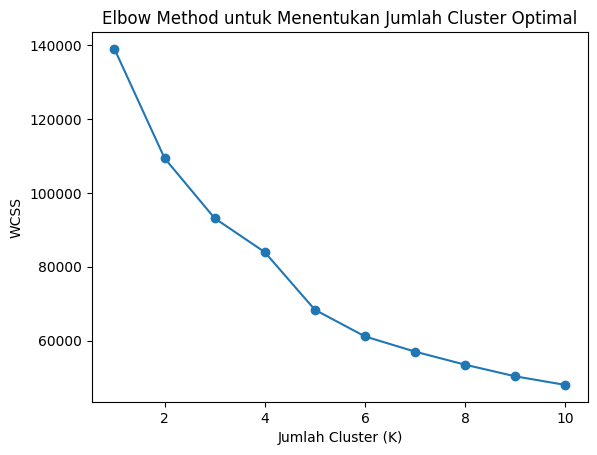

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [111]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary

,season,holiday,weathersit,temp,atemp,hum,windspeed,cnt
cluster,,,,,,,,
0,3.421982,0.039450,1.200393,0.469515,0.455080,0.702646,0.135955,126.384495
1,2.716696,0.019391,1.180337,0.693857,0.650423,0.513186,0.210318,362.897809
2,1.183583,0.040796,1.252396,0.291688,0.289681,0.520406,0.228657,105.440895
3,2.359385,0.010791,2.443100,0.483931,0.463349,0.836037,0.194898,113.880641


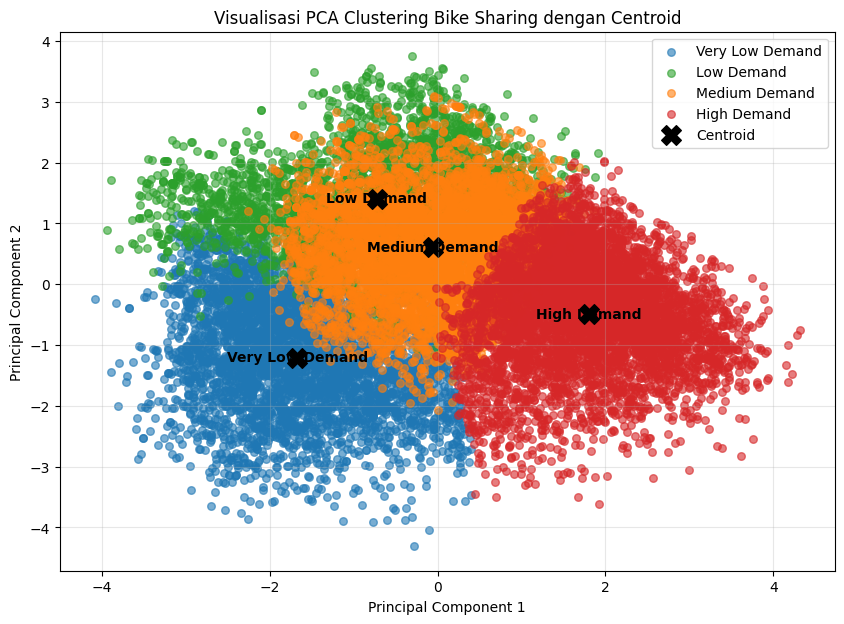

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)
pca_df['cluster'] = df['cluster'].values

cluster_cnt_mean = df.groupby('cluster')['cnt'].mean().sort_values()

cluster_name_map = {}
demand_labels = [
    "Very Low Demand",
    "Low Demand",
    "Medium Demand",
    "High Demand"
]

for cluster_id, label in zip(cluster_cnt_mean.index, demand_labels):
    cluster_name_map[cluster_id] = label

pca_df['cluster_name'] = pca_df['cluster'].map(cluster_name_map)

centroids_pca = pca_df.groupby('cluster')[['PC1', 'PC2']].mean()

plt.figure(figsize=(10, 7))

colors = {
    "Very Low Demand": "#1f77b4",   # biru
    "Low Demand": "#2ca02c",        # hijau
    "Medium Demand": "#ff7f0e",     # oranye
    "High Demand": "#d62728"        # merah
}

for name, color in colors.items():
    subset = pca_df[pca_df['cluster_name'] == name]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=name,
        alpha=0.6,
        color=color,
        s=30
    )

plt.scatter(
    centroids_pca['PC1'],
    centroids_pca['PC2'],
    c='black',
    s=200,
    marker='X',
    label='Centroid'
)

for cluster_id, row in centroids_pca.iterrows():
    plt.text(
        row['PC1'],
        row['PC2'],
        cluster_name_map[cluster_id],
        fontsize=10,
        fontweight='bold',
        ha='center',
        va='center',
        color='black'
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi PCA Clustering Bike Sharing dengan Centroid")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [117]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg_features = [
    'season',
    'holiday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed'
]

X = df[logreg_features]
y = df['cluster']  

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9159953970080552

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1019
           1       0.87      0.87      0.87      1031
           2       0.98      0.98      0.98       814
           3       0.94      0.94      0.94       612

    accuracy                           0.92      3476
   macro avg       0.92      0.92      0.92      3476
weighted avg       0.92      0.92      0.92      3476



In [118]:
import joblib

joblib.dump(kmeans, "kmeans_bike_k4.joblib")
joblib.dump(logreg, "logreg_demand_model.joblib")
joblib.dump(scaler, "logreg_scaler.joblib")
joblib.dump(logreg_features, "logreg_features.joblib")

print("Model, scaler, dan fitur berhasil disimpan!")


Model, scaler, dan fitur berhasil disimpan!
